In [20]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

##1.How many are there in each Team and the percentage splitting with respect to the total employees.
##2.Segregate the employees w.r.t different positions.
##3.Find from which age group most of the employees belong to.
##4.Find out under which team and position, spending in terms of salary is high.
##5.Find if there is any correlation between age and salary , represent it visually.
##Before doing the above questions, perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.Download the dataset from this link. Dataset


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv('fifa_data.csv')
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


## Data exploration and cleaning

### Examining dataframe structure

#### To display column names

In [2]:
df1.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

#### To display index

In [3]:
df1.index

RangeIndex(start=0, stop=458, step=1)

#### To print summary of dataframe

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


### Data story- The result shows college column  having only 374 values and salary  column having only 447values.rest is having all values non null

#### To print dimension

In [5]:
df1.shape

(458, 9)

#### To print size

In [6]:
df1.size

4122

#### To print datatypes

In [7]:
df1.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
dtype: object

#### To explore basic statistical summary 

In [8]:
df1.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
df1.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


#### To get the data of first five rows

In [10]:
df1.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


#### To get the data of last five rows

In [11]:
df1.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


#### To count the number of  unique values of a particular column we use value count 

In [12]:
df1['College'].value_counts()

College
Kentucky           22
Duke               20
Kansas             19
North Carolina     16
UCLA               15
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: count, Length: 118, dtype: int64

#### To check if there are any missing values in the dataframe

In [13]:
df1.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

### Data story-shows there are 84 null values in college column and 11 null values in salary column

#### To check if there are any duplicates 

In [14]:
df1.duplicated().sum()

0

#### To find the unique values in a column

In [16]:
df1.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

#### count of unique values

In [17]:
df1.Position.nunique()

5

#### Handling missing data

In [ ]:
#### To check if any data is null.If it is null, it returns True , if not null, it returns False.

In [18]:
df1.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


#### To fill the null values with unknown

In [19]:
df1.fillna('Unknown')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,Unknown
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Data story- Here we filled the empty rows with the word 'unknown' without dropping it.

### First step- the column height needs to be updated with the  random values. 

In [22]:
import numpy as np
df1['Height']=np.random.randint(150,181,458)
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,160,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,153,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,169,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,161,231,Kansas,947276.0


#### Data story- here the column height is being updated with random values from 151 to 180.

## 1.How many are there in each Team and the percentage splitting with respect to the total employees.


In [23]:
df1['Name'].value_counts()## here each name is unique in the name column. 

Name
Avery Bradley       1
Kyle Korver         1
Al Horford          1
Kirk Hinrich        1
Tim Hardaway Jr.    1
                   ..
Eric Moreland       1
Ben McLemore        1
Kosta Koufos        1
Rudy Gay            1
Priyanka            1
Name: count, Length: 458, dtype: int64

In [24]:
new=df1['Team'].value_counts().sort_values(ascending=False)
new

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Detroit Pistons           15
Dallas Mavericks          15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Chicago Bulls             15
Cleveland Cavaliers       15
Boston Celtics            15
Indiana Pacers            15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Charlotte Hornets         15
Miami Heat                15
Washington Wizards        15
Denver Nuggets            15
Oklahoma City Thunder     15
Portland Trail Blazers    15
Brooklyn Nets             15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

### Data story- The above table shows the number of persons included in each team since the people are not occuring more than once, the  value count and the number of people in each team will be the same.

In [25]:
data1={'Team':['New Orleans Pelicans','Memphis Grizzlies','Utah Jazz','New York Knicks','Milwaukee Bucks','Detroit Pistons','Dallas Mavericks',
               'Philadelphia 76ers','Toronto Raptors','Golden State Warriors','Los Angeles Clippers','Los Angeles Lakers','Phoenix Suns',
               'Sacramento  Kings','Chicago Bulls','Cleveland Cavaliers','Boston Celtics','Indiana Pacers','Houston Rockets','San Antonio Spurs','Atlanta Hawks',
                'Charlotte Hornets','Miami Heat','Washington Wizards','Denver Nuggets','Oklahoma City Thunder','Portland Trail Blazers','Brooklyn Nets',
                  'Orlando Magic','Minnesota Timberwolves'], 'Number of people in each team':[19,18,16,16,16,15,15,15,15,15,
                  15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14,14]}
                  
df2=pd.DataFrame(data1)
df2


,Team,Number of people in each team
0,New Orleans Pelicans,19
1,Memphis Grizzlies,18
2,Utah Jazz,16
3,New York Knicks,16
4,Milwaukee Bucks,16
5,Detroit Pistons,15
6,Dallas Mavericks,15
7,Philadelphia 76ers,15
8,Toronto Raptors,15
9,Golden State Warriors,15


In [26]:
percentage_split=(df2['Number of people in each team']/458)*100
percentage_split

0     4.148472
1     3.930131
2     3.493450
3     3.493450
4     3.493450
5     3.275109
6     3.275109
7     3.275109
8     3.275109
9     3.275109
10    3.275109
11    3.275109
12    3.275109
13    3.275109
14    3.275109
15    3.275109
16    3.275109
17    3.275109
18    3.275109
19    3.275109
20    3.275109
21    3.275109
22    3.275109
23    3.275109
24    3.275109
25    3.275109
26    3.275109
27    3.275109
28    3.056769
29    3.056769
Name: Number of people in each team, dtype: float64

## 2.Segregate the employees w.r.t different positions.

In [27]:
df1['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [28]:
result = df1.loc[df1['Position']== 'SG','Name']
result

2          John Holland
3           R.J. Hunter
12          Evan Turner
13          James Young
15     Bojan Bogdanovic
             ...       
433    Gerald Henderson
437       C.J. McCollum
438        Luis Montero
444          Alec Burks
449         Rodney Hood
Name: Name, Length: 102, dtype: object

In [32]:
result1=df1.loc[df1['Position']=='PF', 'Name']
result1

4         Jonas Jerebko
5          Amir Johnson
6         Jordan Mickey
24     Chris McCullough
25          Willie Reed
             ...       
435      Meyers Leonard
441         Noah Vonleh
442       Trevor Booker
446      Derrick Favors
452          Trey Lyles
Name: Name, Length: 100, dtype: object

In [33]:
result2=df1.loc[df1['Position']=='PG', 'Name']
result2

0      Avery Bradley
8       Terry Rozier
9       Marcus Smart
11     Isaiah Thomas
19      Jarrett Jack
           ...      
440    Brian Roberts
443       Trey Burke
445       Dante Exum
453     Shelvin Mack
454        Raul Neto
Name: Name, Length: 92, dtype: object

In [34]:
result3=df1.loc[df1['Position']=='SF', 'Name']
result3

1                 Jae Crowder
32     Thanasis Antetokounmpo
33            Carmelo Anthony
35           Cleanthony Early
42               Lance Thomas
                ...          
428           Al-Farouq Aminu
432          Maurice Harkless
448            Gordon Hayward
450                Joe Ingles
451             Chris Johnson
Name: Name, Length: 85, dtype: object

In [35]:
result4=df1.loc[df1['Position']=='C', 'Name']
result4

7         Kelly Olynyk
10     Jared Sullinger
14        Tyler Zeller
23         Brook Lopez
27          Henry Sims
            ...       
439      Mason Plumlee
447        Rudy Gobert
455       Tibor Pleiss
456        Jeff Withey
457           Priyanka
Name: Name, Length: 79, dtype: object

## 3.Find from which age group most of the employees belong to.

In [45]:
df1['Age_group']=[' Young Adult' if x<30 and x>20 else 'Adult' for x in df1.Age]
df1
    

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,df1,Age group,Age_group
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0,Young Adult,Young Adult,Young Adult
1,Jae Crowder,Boston Celtics,99,SF,25,160,235,Marquette,6796117.0,Young Adult,Young Adult,Young Adult
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,NaN,Young Adult,Young Adult,Young Adult
3,R.J. Hunter,Boston Celtics,28,SG,22,153,185,Georgia State,1148640.0,Young Adult,Young Adult,Young Adult
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0,Young Adult,Young Adult,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0,Young Adult,Young Adult,Young Adult
454,Raul Neto,Utah Jazz,25,PG,24,169,179,NaN,900000.0,Young Adult,Young Adult,Young Adult
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0,Young Adult,Young Adult,Young Adult
456,Jeff Withey,Utah Jazz,24,C,26,161,231,Kansas,947276.0,Young Adult,Young Adult,Young Adult


In [47]:
df1.drop('Age group', axis=1, inplace=True)
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,df1,Age_group
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0,Young Adult,Young Adult
1,Jae Crowder,Boston Celtics,99,SF,25,160,235,Marquette,6796117.0,Young Adult,Young Adult
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,NaN,Young Adult,Young Adult
3,R.J. Hunter,Boston Celtics,28,SG,22,153,185,Georgia State,1148640.0,Young Adult,Young Adult
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0,Young Adult,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0,Young Adult,Young Adult
454,Raul Neto,Utah Jazz,25,PG,24,169,179,NaN,900000.0,Young Adult,Young Adult
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0,Young Adult,Young Adult
456,Jeff Withey,Utah Jazz,24,C,26,161,231,Kansas,947276.0,Young Adult,Young Adult


In [48]:
df1.drop('df1', axis=1, inplace=True)
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_group
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0,Young Adult
1,Jae Crowder,Boston Celtics,99,SF,25,160,235,Marquette,6796117.0,Young Adult
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,NaN,Young Adult
3,R.J. Hunter,Boston Celtics,28,SG,22,153,185,Georgia State,1148640.0,Young Adult
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0,Young Adult
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0,Young Adult
454,Raul Neto,Utah Jazz,25,PG,24,169,179,NaN,900000.0,Young Adult
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0,Young Adult
456,Jeff Withey,Utah Jazz,24,C,26,161,231,Kansas,947276.0,Young Adult


In [49]:
df1['Age_group'].value_counts()

Age_group
 Young Adult    315
Adult           143
Name: count, dtype: int64

### Data story- most of the employees fall under the age group 20 and 30 which is young adult.

## 4.Find out under which team and position, spending in terms of salary is high.

In [50]:
df4=df1.sort_values(by='Salary', ascending=False)
df4

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_group
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,169,212,NaN,25000000.0,Adult
169,LeBron James,Cleveland Cavaliers,23,SF,31,180,250,NaN,22970500.0,Adult
33,Carmelo Anthony,New York Knicks,7,SF,32,180,240,Syracuse,22875000.0,Adult
251,Dwight Howard,Houston Rockets,12,C,30,169,265,NaN,22359364.0,Adult
339,Chris Bosh,Miami Heat,1,PF,32,158,235,Georgia Tech,22192730.0,Adult
...,...,...,...,...,...,...,...,...,...,...
273,Alex Stepheson,Memphis Grizzlies,35,PF,28,157,270,USC,NaN,Young Adult
350,Briante Weber,Miami Heat,12,PG,23,160,165,Virginia Commonwealth,NaN,Young Adult
353,Dorell Wright,Miami Heat,11,SF,30,179,205,NaN,NaN,Adult
397,Axel Toupane,Denver Nuggets,6,SG,23,162,210,NaN,NaN,Young Adult


In [51]:
df4.loc[:, ('Team', 'Position', 'Salary')]## retrieving the columns Team, Position and Salary.

,Team,Position,Salary
109,Los Angeles Lakers,SF,25000000.0
169,Cleveland Cavaliers,SF,22970500.0
33,New York Knicks,SF,22875000.0
251,Houston Rockets,C,22359364.0
339,Miami Heat,PF,22192730.0
...,...,...,...
273,Memphis Grizzlies,PF,NaN
350,Miami Heat,PG,NaN
353,Miami Heat,SF,NaN
397,Denver Nuggets,SG,NaN


### Data story-From the data frame it is clear that the Team  Los angeles Lakers and Position SF is spending salary too much.

## 5.Find if there is any correlation between age and salary , represent it visually.


In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
new_df=df1.drop(['Name','Team','Position', 'Height','Weight', 'Number', 'College', 'Age_group' ], axis=1)
new_df

,Age,Salary
0,25,7730337.0
1,25,6796117.0
2,27,NaN
3,22,1148640.0
4,29,5000000.0
...,...,...
453,26,2433333.0
454,24,900000.0
455,26,2900000.0
456,26,947276.0


In [55]:
corr=new_df.corr()
corr

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


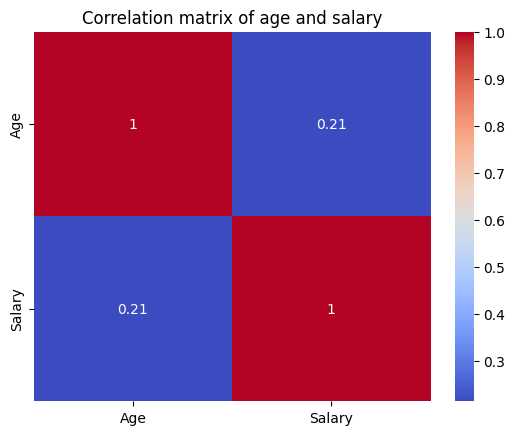

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
new_df=df1.drop(['Name','Team','Position', 'Height','Weight', 'Number', 'College', 'Age_group'], axis=1)
corr=new_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of age and salary")
plt.show()

### Data story-The above figure shows the correlation matrix between age and salary.